In [32]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings
import circlify as circ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pywaffle import Waffle
from pprint import pprint as pp
import squarify


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



In [6]:
reserve_df = pd.read_csv("global_lithium_reserves.csv")
# reserve_df['reserve_in_100k_tons(rounded)'] = round(reserve_df['reserve'].apply(lambda x: x/100000))

# Add a new row for the rest of the countries
reserve_df = reserve_df.append({'country': 'Others', 'reserve': reserve_df[reserve_df['country'].isin(['Finland', 'Austria', 'Kazakhstan'])]['reserve'].sum()}, ignore_index=True)

# Drop Finland, Austria, Kazakhstan from the country column.
reserve_df = reserve_df[~reserve_df['country'].isin(['Finland', 'Austria', 'Kazakhstan'])]

reserve_df.sort_values(by='reserve', ascending=False, inplace=True)
reserve_df['reserve_in_1000_tons'] = reserve_df['reserve'].apply(lambda x: x/1000)

reserve_df

,country,reserve,reserve_in_1000_tons
1,Bolivia,21000000,21000.0
2,Argentina,20000000,20000.0
0,United States,12000000,12000.0
3,Chile,11000000,11000.0
4,Australia,7900000,7900.0
5,China,6800000,6800.0
6,Germany,3200000,3200.0
7,Congo,3000000,3000.0
8,Canada,2900000,2900.0
9,Mexico,1700000,1700.0


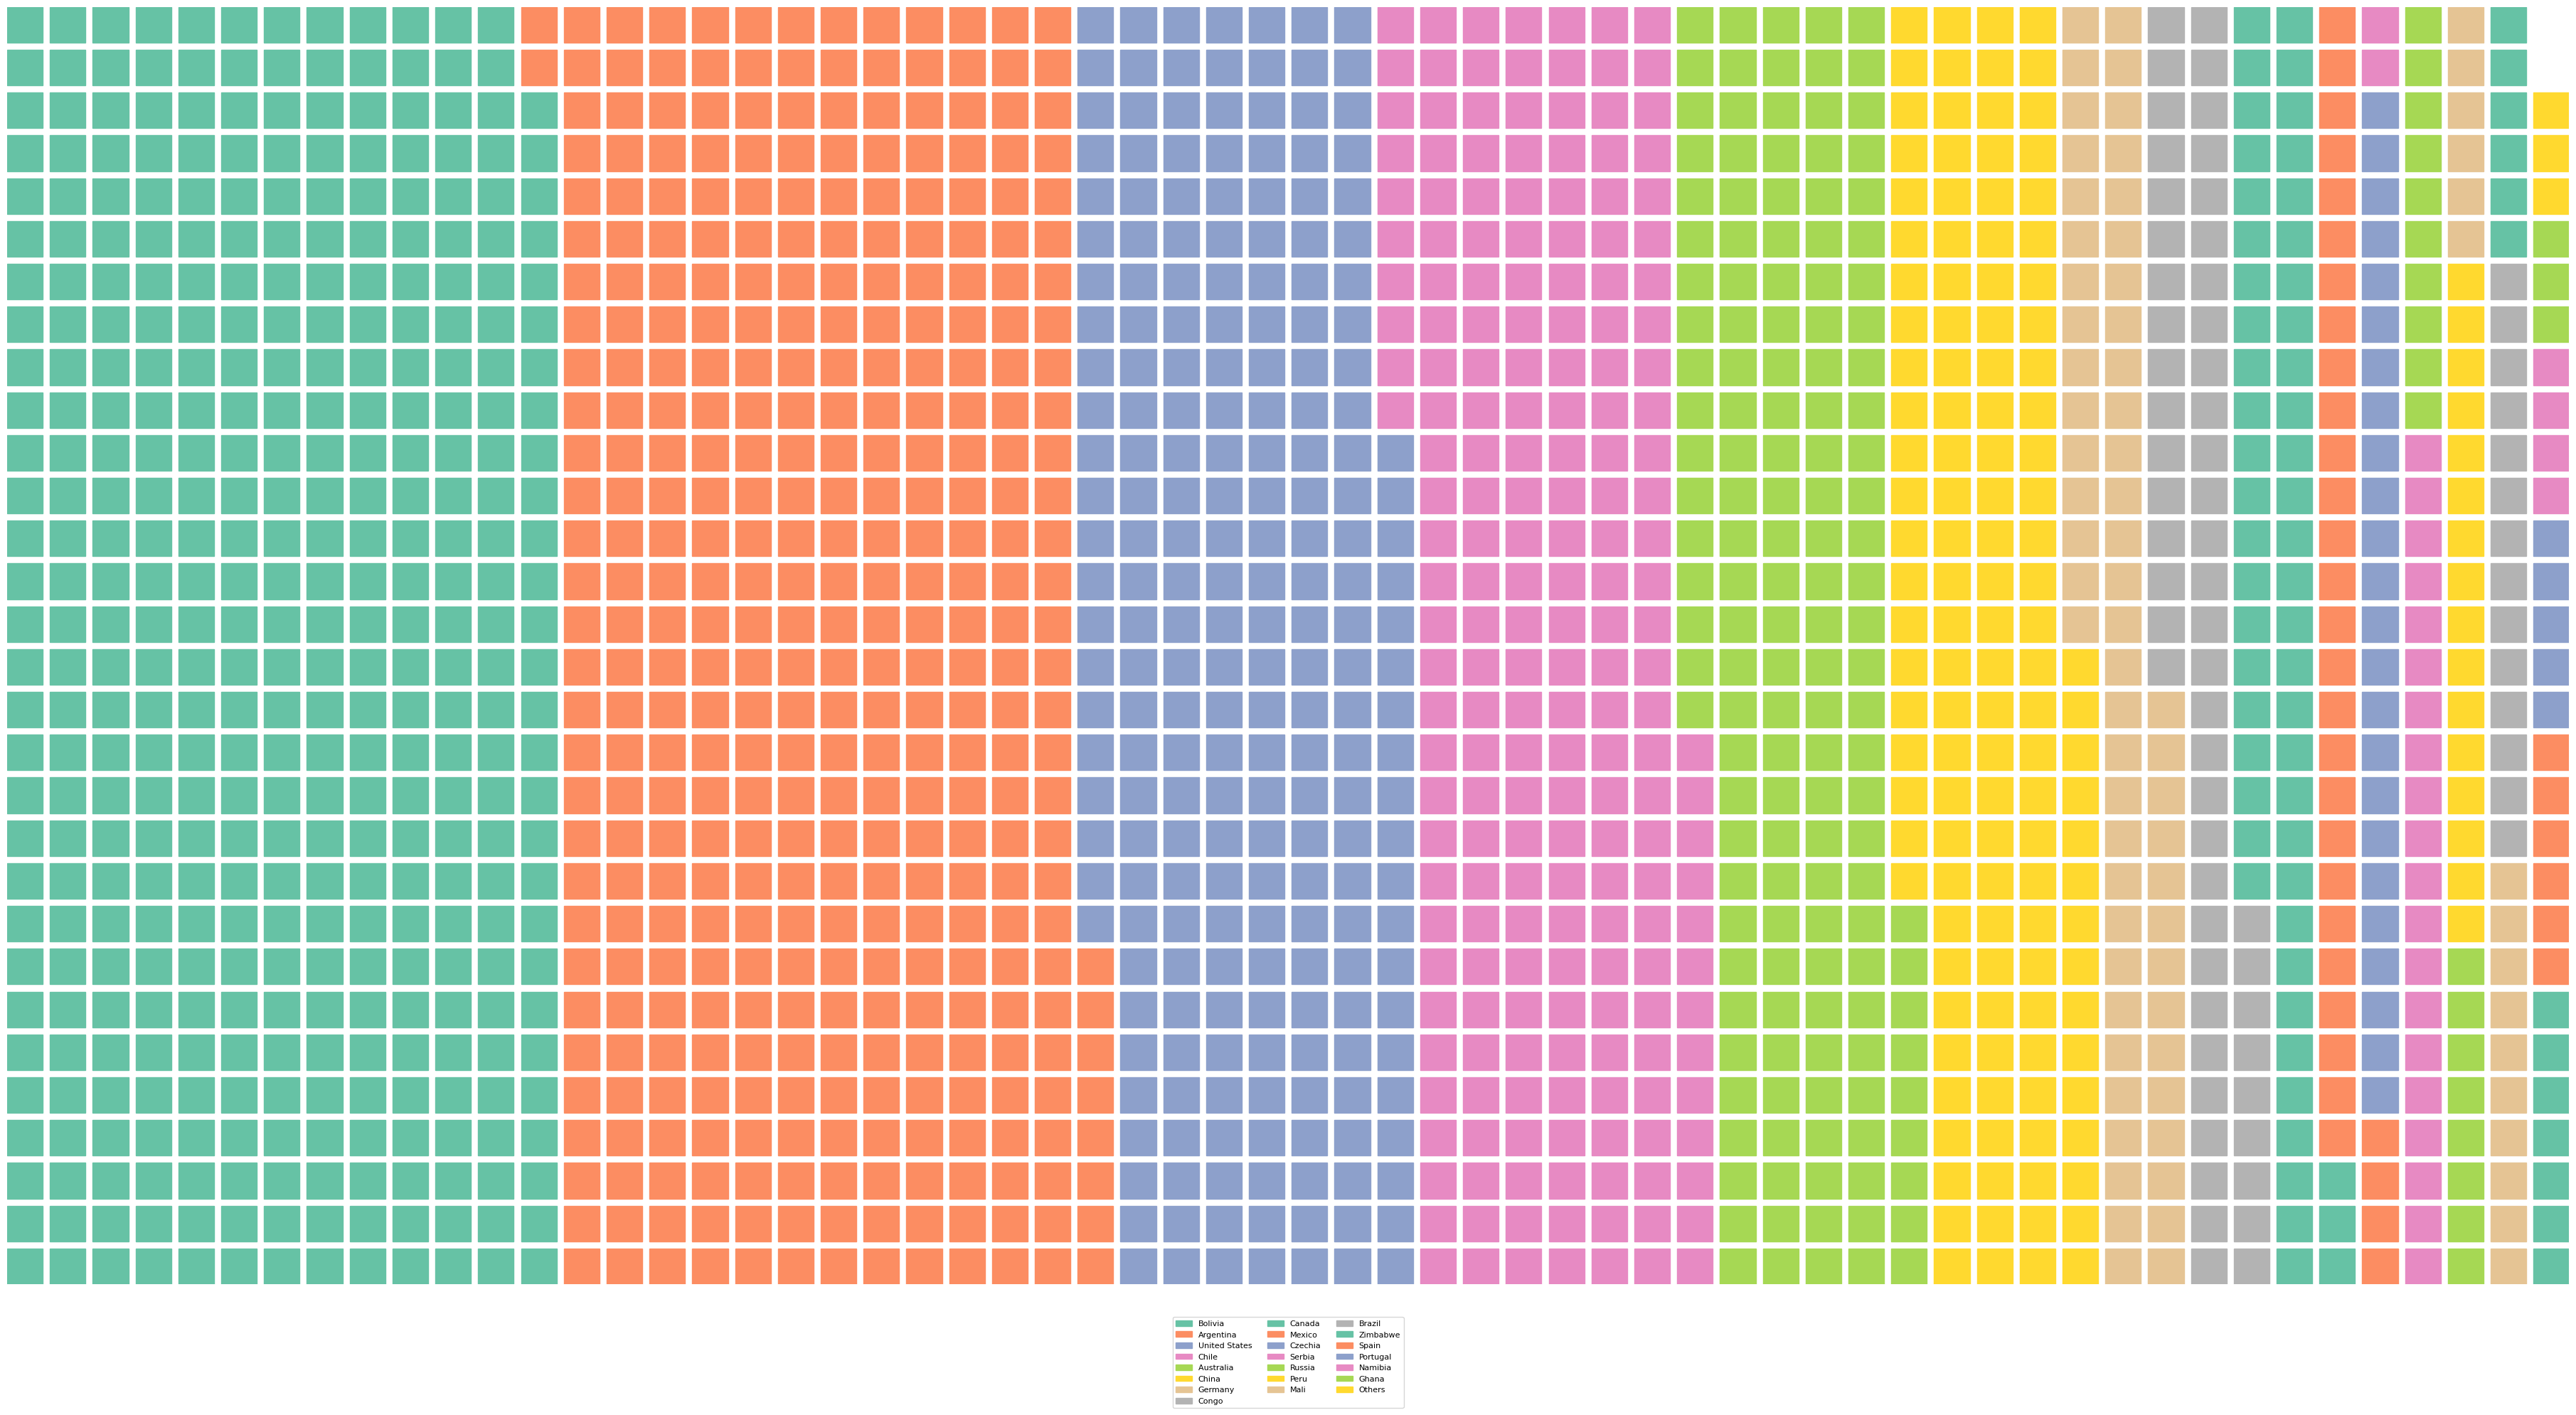

In [27]:
plt.figure(FigureClass=Waffle, figsize=(100,20), rows=30, columns = 60, 
                values=list(reserve_df['reserve_in_1000_tons']),
                labels=list(reserve_df['country']),
                legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.1), 
                        'ncol':3, 'fontsize':8})

plt.savefig('reserve.pdf')

In [8]:
total_global_reserve = reserve_df['reserve'].sum()

In [9]:
production_df = pd.read_csv("global_production.csv")
production_df['production_in_tons'] = production_df['production'].apply(lambda x: x*1000)
# drop "production" column.
production_df.drop('production', axis=1, inplace=True)
production_df['production_in_1000_tons'] = round(production_df['production_in_tons'].apply(lambda x: x/1000))

production_df.sort_values(by='production_in_tons', ascending=True, inplace=True)

production_2022 = production_df[production_df.year==2022].head(50)

In [10]:
total_global_production = production_df['production_in_tons'].sum()

In [11]:
# Create dataframe of total global reserve and total global production
total_df = pd.DataFrame({'reserve': [total_global_reserve], 'production': [total_global_production]})

total_transposed = total_df.T.reset_index()
total_transposed.columns = ['type', 'value']

total_transposed.to_csv('total_transposed.csv', index=False)

total_transposed

,type,value
0,reserve,97318000.0
1,production,749300.0


In [12]:
circles = circ.circlify([97318000, 749300])

pp(circles)




[Circle(x=-0.9193315959122236, y=0.0, r=0.08066840408777637, level=1, ex={'datum': 749300}),
 Circle(x=0.08066840408777642, y=0.0, r=0.9193315959122236, level=1, ex={'datum': 97318000})]


In [13]:
production_2022_vs_reserve = production_2022.merge(reserve_df, on='country', how='right')

production_2022_vs_reserve.to_csv('production_2022_vs_reserve.csv', index=False)

production_2022_vs_reserve

,year,country,production_in_tons,production_in_1000_tons,reserve,reserve_in_1000_tons
0,NaN,Bolivia,NaN,NaN,21000000,21000.0
1,2022.0,Argentina,6200.0,6.0,20000000,20000.0
2,2022.0,United States,600.0,1.0,12000000,12000.0
3,2022.0,Chile,39000.0,39.0,11000000,11000.0
4,2022.0,Australia,61000.0,61.0,7900000,7900.0
5,2022.0,China,19000.0,19.0,6800000,6800.0
6,NaN,Germany,NaN,NaN,3200000,3200.0
7,NaN,Congo,NaN,NaN,3000000,3000.0
8,NaN,Canada,NaN,NaN,2900000,2900.0
9,NaN,Mexico,NaN,NaN,1700000,1700.0


In [24]:
production_df_transposed = production_df.pivot(index='year', columns='country', values='production_in_tons')

production_df_transposed.reset_index(inplace=True)

# Add a column with total production_in_tons.
production_df_transposed['total'] = production_df_transposed.sum(axis=1)

production_df_transposed.to_csv('production_df_transposed.csv', index=False)

production_df_transposed

country,year,Argentina,Australia,Brazil,Chile,China,Others,Portugal,United States,Zimbabwe,total
0,2011,3000.0,11700.0,300.0,11900.0,4100.0,0.0,600.0,1000.0,500.0,35111.0
1,2012,2700.0,12700.0,200.0,12300.0,4500.0,0.0,300.0,1000.0,1100.0,36812.0
2,2013,2500.0,10100.0,400.0,10500.0,4700.0,0.0,300.0,900.0,1000.0,32413.0
3,2014,3200.0,12400.0,200.0,10800.0,2300.0,0.0,300.0,900.0,900.0,33014.0
4,2015,3600.0,11900.0,100.0,9800.0,2000.0,0.0,300.0,900.0,900.0,31515.0
5,2016,5800.0,14000.0,200.0,13600.0,2300.0,0.0,400.0,900.0,1000.0,40216.0
6,2017,5700.0,21300.0,300.0,14200.0,6800.0,100.0,800.0,900.0,800.0,52917.0
7,2018,6400.0,57000.0,1000.0,17000.0,7100.0,3000.0,1200.0,900.0,1600.0,97218.0
8,2019,6300.0,45000.0,2200.0,19200.0,10800.0,400.0,900.0,900.0,1200.0,88919.0
9,2020,5900.0,40000.0,1400.0,21600.0,13300.0,100.0,300.0,900.0,400.0,85920.0


# U.S. import by country

In [26]:
# Create dataframe.
import_countries_df = pd.DataFrame({'country': ['Argentina', 'Chile', 'China', 'Russia', 'Other'], 'import_share': [51, 40, 4, 3, 2]})

import_countries_df

,country,import_share
0,Argentina,51
1,Chile,40
2,China,4
3,Russia,3
4,Other,2


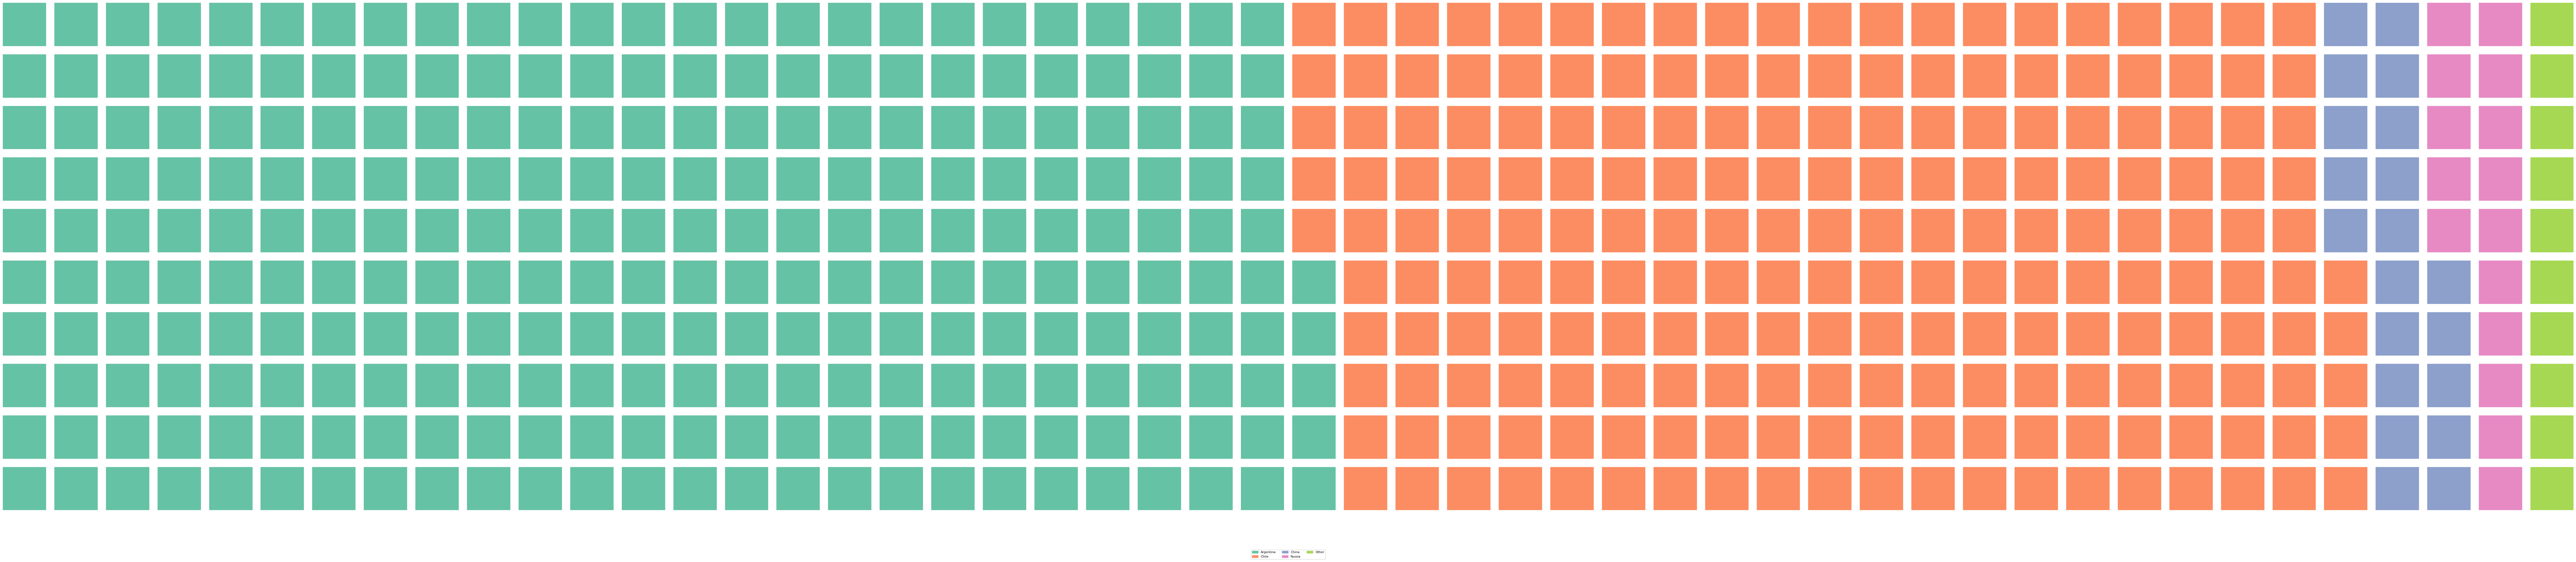

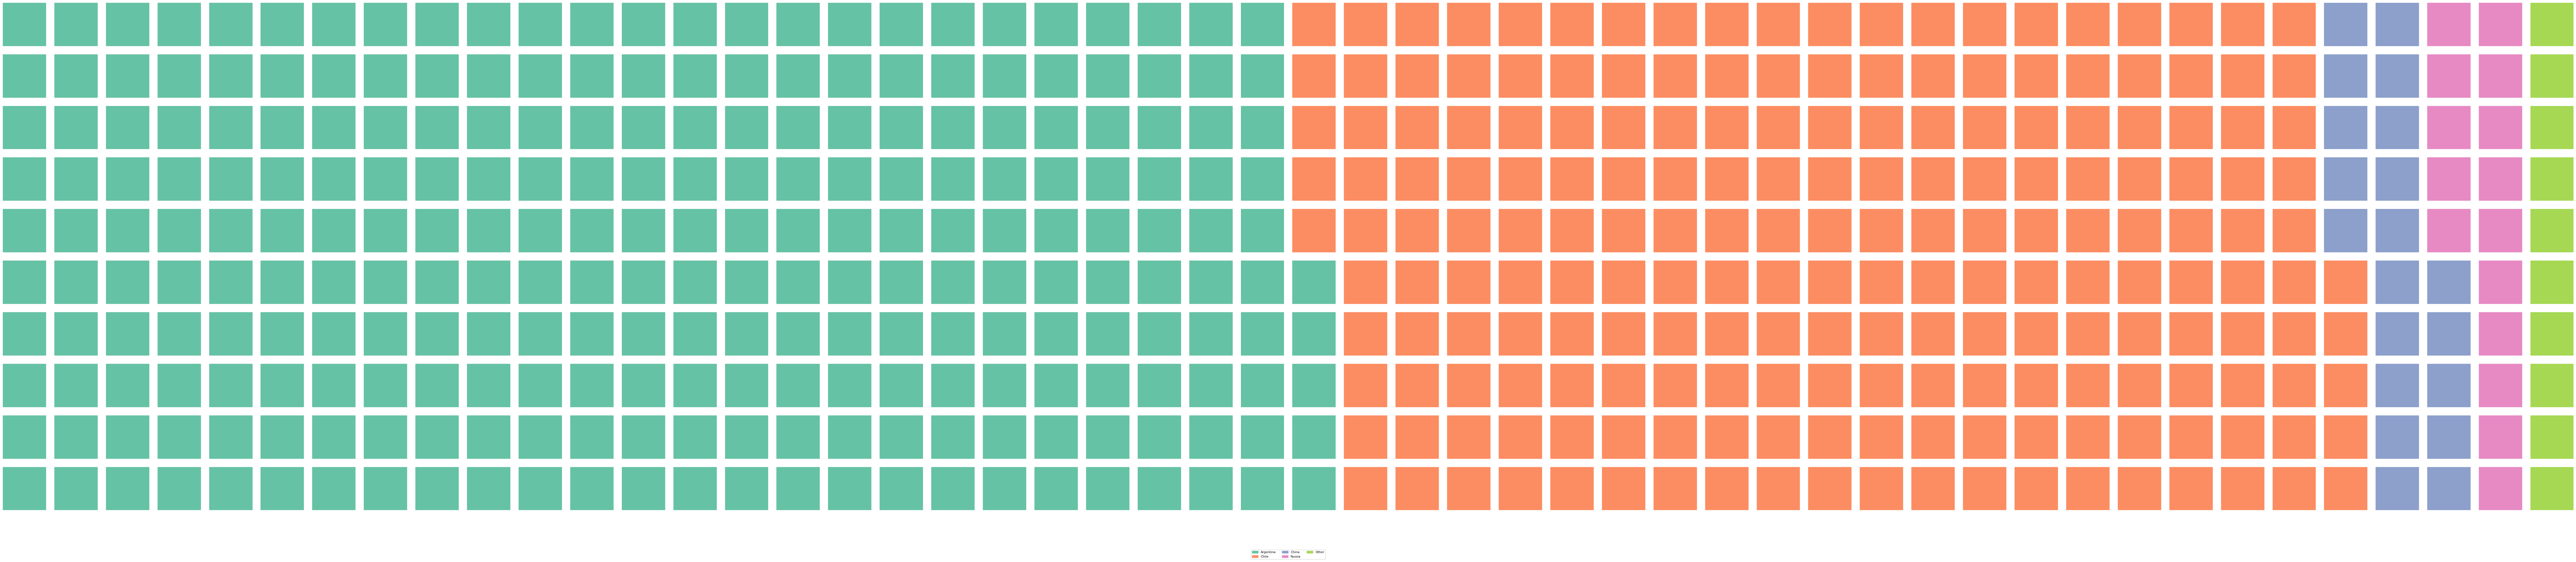

In [31]:
plt.figure(FigureClass=Waffle, figsize=(100,20), rows=10, columns = 50, 
                values=list(import_countries_df['import_share']),
                labels=list(import_countries_df['country']),
                legend={'loc':'lower center', 'bbox_to_anchor': (0.5, -0.1), 
                        'ncol':3, 'fontsize':8})

# plt.savefig('reserve.pdf')

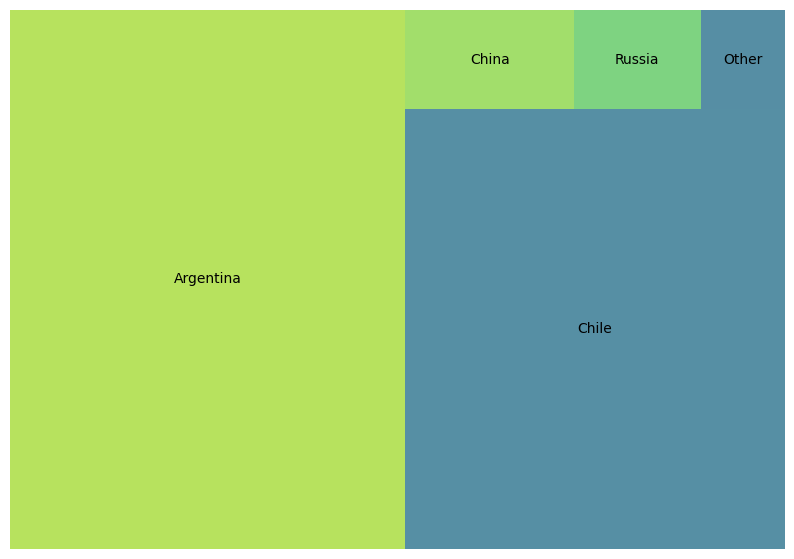

In [39]:
squarify.plot(sizes=import_countries_df['import_share'], label=import_countries_df['country'], alpha=.8 )
plt.axis('off')
# set figsize
plt.gcf().set_size_inches(10, 7)

plt.savefig('us_import.svg')
